In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

## Global Happiness data set from Kaggle.com

Inspired by the following video from Stanford CS50:

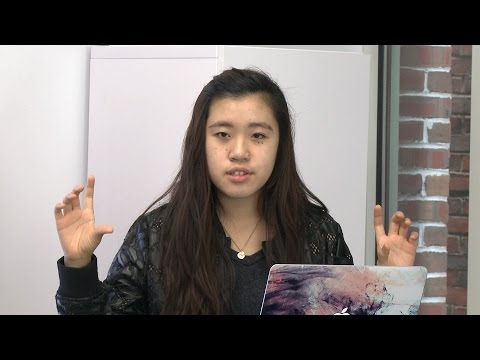

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("POe1cufDWFs",width=450, height=200)

In [3]:
df = pd.read_csv('2016.csv')
df.head(7)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749


In [4]:
economy = df['Economy (GDP per Capita)']
happiness = df['Happiness Score']

By using simple linear regression we can draw a trend line for $H(E) = aE+b$ where $H$ is happiness, and $E$ is GDP per Capita. 

To find $a$ and $b$ we use the sum of squares method [(Reference)](https://02402.compute.dtu.dk/enotes/chapter5-SimpleLinearRegression)

In [7]:
def SXX(x):
    xm = np.mean(x)
    s = 0
    for i in range (len(x)):
        s += (x[i] - xm) ** 2
    return s

In [8]:
def beta1(x, y):
    xm = np.mean(x)
    ym = np.mean(y)
    s = 0
    for i in range(len(y)):
        s += (y[i] - ym) * (x[i] - xm) / SXX(x)
    return s

In [11]:
def beta0(x, y):
    xm = np.mean(x)
    ym = np.mean(y)
    b1 = beta1(x, y)
    return ym - (b1 * xm)

In [12]:
a = beta1(economy, happiness)
b = beta0(economy, happiness)

In [14]:
yEstimate = list(map(lambda x: (a * x) + b , economy))

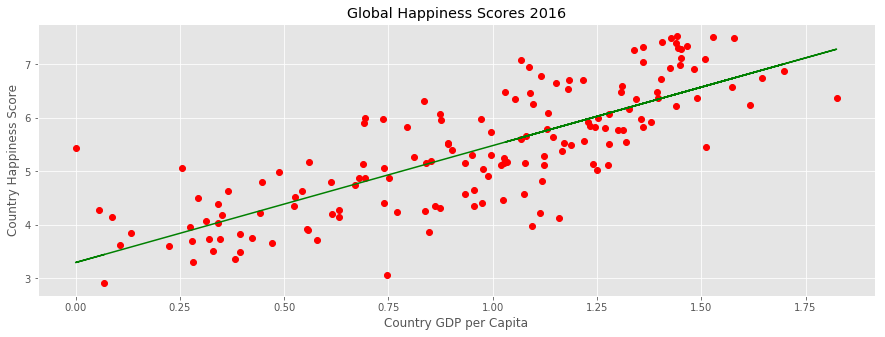

In [16]:
plt.figure(figsize = (15,5))
plt.plot(economy, happiness, linestyle='None', marker='o', color='r')
plt.plot(economy, yEstimate, color='g')
plt.title('Global Happiness Scores 2016')
plt.xlabel('Country GDP per Capita')
plt.ylabel('Country Happiness Score')
plt.show()


### As we can see, money apparently does makes you happy - who would have known?!